# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).


In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
#!pip install -q pyodbc openpyxl

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data Connection
import pyodbc

# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...
#import ydata_profiling
#from ydata_profiling import ProfileReport

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle, warnings
from onedrivedownloader import download

warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# Directory Environment
BASE_DIR = '.'
DATA_DIR = os.path.join(BASE_DIR, 'data')
TRAIN_FILE = os.path.join(DATA_DIR, 'LP2_Telco_Churn_First.csv')
TEST_FILE = os.path.join(DATA_DIR, 'Telco-churn-second-2000.xlsx.csv')
#SAMPLESUB_FILE = os.path.join(DATA_DIR, 'sample_submission.csv')

## Connecting to the MS-SQL SERVER Database: First Dataset

In [4]:
# Connecting to the Online Dataset on an MS-SQL SERVER
SERVER = 'dap-projects-database.database.windows.net'
DATABASE = 'dapDB'
USERNAME = 'dataAnalyst_LP2'
PASSWORD = 'A3g@3kR$2y'

# This will connection string is an f string that includes all the variable above to extablish a connection to the server
connection_string = f"DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}"

In [5]:
# Python ODBC Connection to the Database
connection = pyodbc.connect(connection_string)

In [6]:
# Querying the online dataset for all the values in the table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

# Accessing the query result into a Panda Dataframe
online_data = pd.read_sql(query, connection)

In [7]:
# Verifying whether the connection is established
online_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
# Saving Online Dataset as .csv in local directory
online_data.to_csv(TRAIN_FILE, index=False)

## Connecting to the OneDrive Excel File: Second Dataset

In [9]:
# Connecting to the excel file through the shared link
ln = "https://azubiafrica-my.sharepoint.com/:f:/r/personal/teachops_azubiafrica_org/Documents/Career%20Accelerator%20Data_Sets/LP2%20Datasets?download=1"

# Accessing the excel file into a Panda Dataframe
onedrive_data = pd.read_excel(download(ln, filename="./data/Telco-churn-second-2000.xlsx"))

In [10]:
onedrive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [11]:
onedrive_data.to_csv('./data/Test_data.csv')

## Connecting to the .csv File from GitHub: Third Dataset

In [12]:
git_data = pd.read_csv('./data/LP2_Telco-churn-last-2000.csv')

In [13]:
git_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [14]:
# Code here
df_train = pd.read_csv(TRAIN_FILE)

In [15]:
df_train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [17]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [18]:
#profile = ProfileReport(df_train, title='Train Dataset', html={'style':{'full_width':True}})
##profile.to_notebook_iframe()
#profile.to_file('[Trainset] Pandas-Profiling_Report.html')

In [19]:
## Univariant Analysis

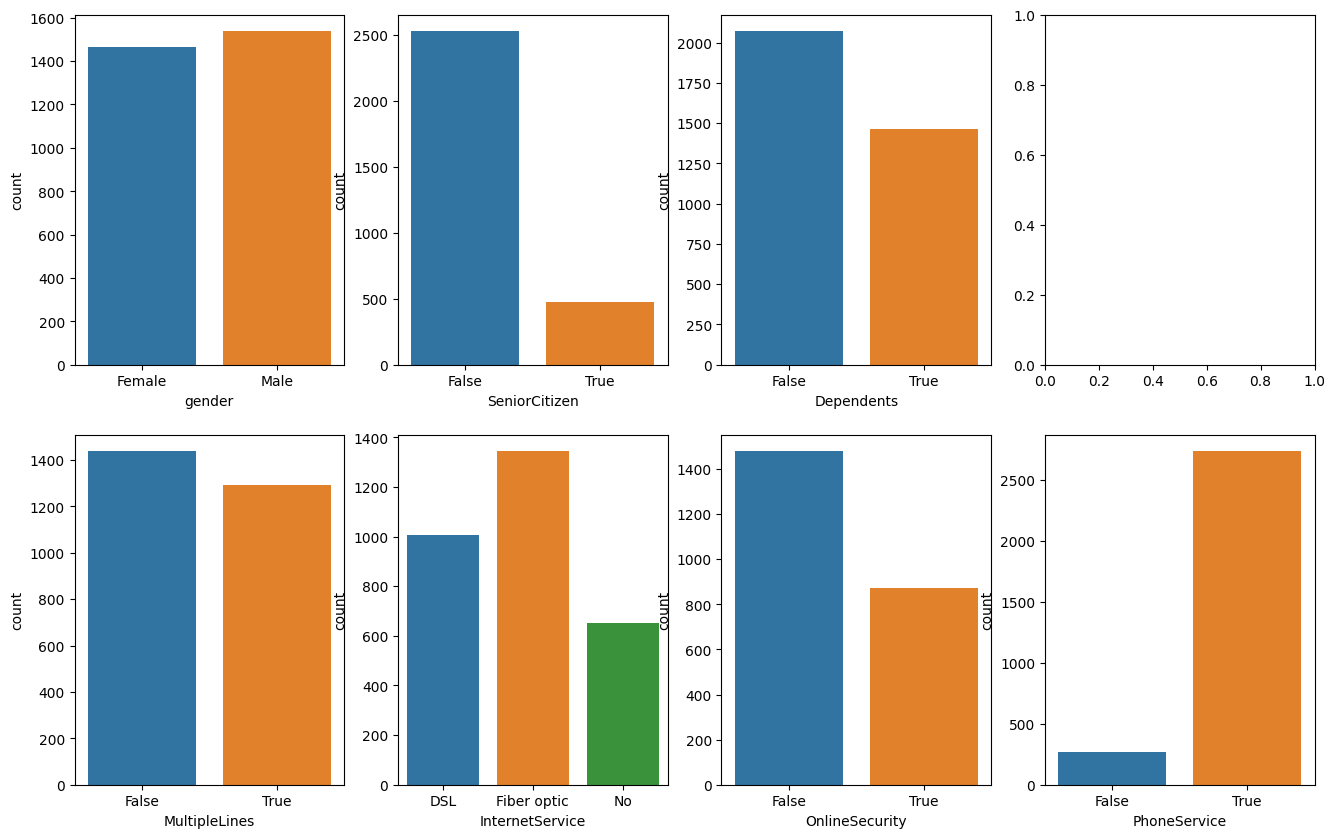

In [20]:
fig, axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot(data=df_train, x='gender',ax=axes[0,0])
sns.countplot(data=df_train, x='SeniorCitizen',ax=axes[0,1])
sns.countplot(data=df_train, x='Partner',ax=axes[0,2])
sns.countplot(data=df_train, x='Dependents',ax=axes[0,2])
sns.countplot(data=df_train, x='PhoneService',ax=axes[1,3])
sns.countplot(data=df_train, x='MultipleLines',ax=axes[1,0])
sns.countplot(data=df_train, x='InternetService',ax=axes[1,1])
sns.countplot(data=df_train, x='OnlineSecurity',ax=axes[1,2])
plt.show()


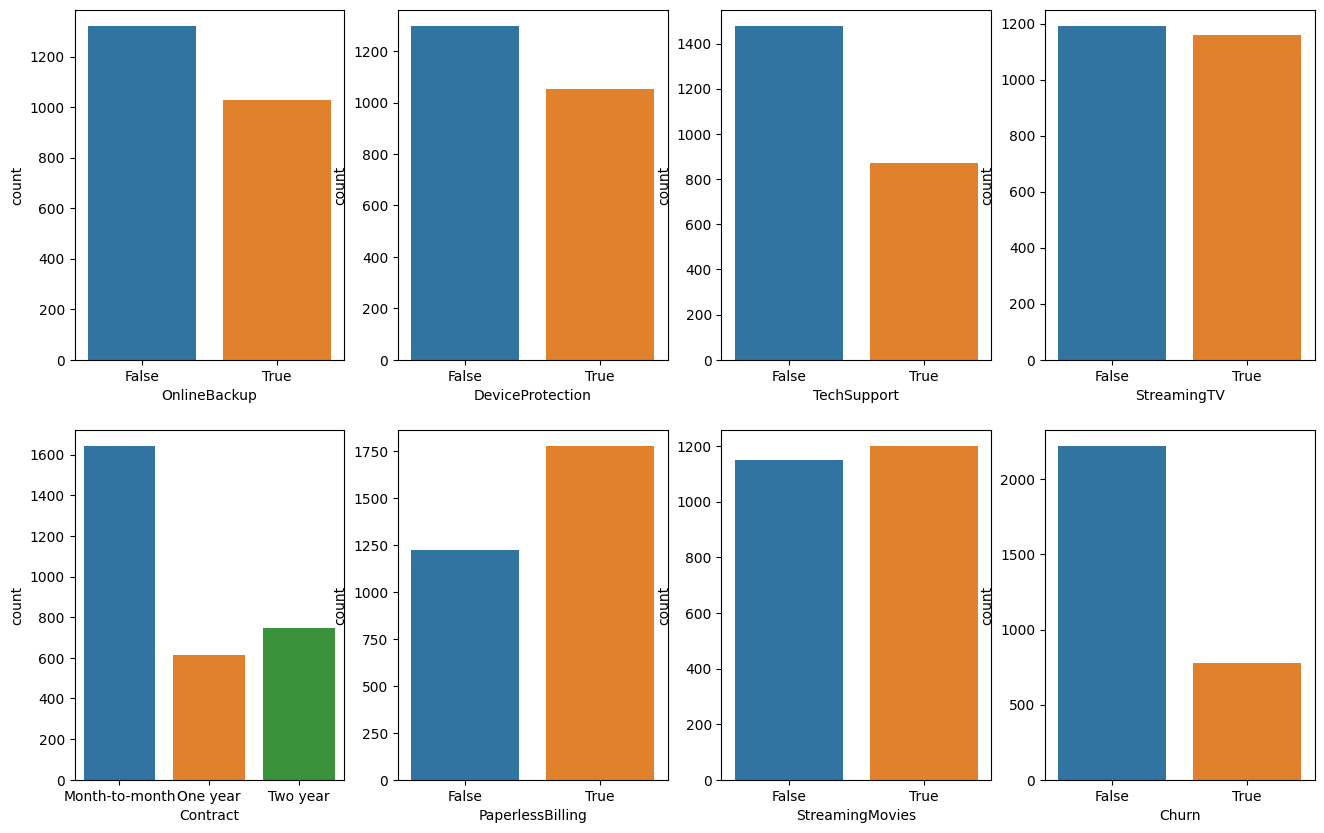

In [21]:
fig, axes = plt.subplots(2,4, figsize=(16,10))

sns.countplot(data=df_train, x='OnlineBackup',ax=axes[0,0])
sns.countplot(data=df_train, x='DeviceProtection',ax=axes[0,1])
sns.countplot(data=df_train, x='TechSupport',ax=axes[0,2])
sns.countplot(data=df_train, x='StreamingTV',ax=axes[0,3])
sns.countplot(data=df_train, x='Contract',ax=axes[1,0])
sns.countplot(data=df_train, x='PaperlessBilling',ax=axes[1,1])
sns.countplot(data=df_train, x='Churn',ax=axes[1,3])
sns.countplot(data=df_train, x='StreamingMovies',ax=axes[1,2])
plt.show()


<Axes: xlabel='count', ylabel='PaymentMethod'>

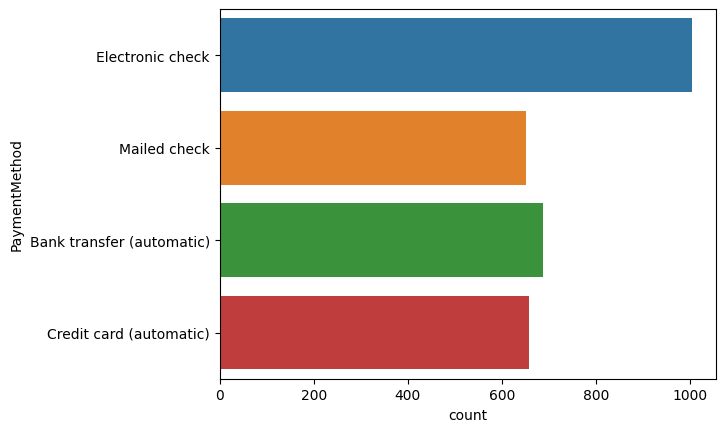

In [22]:
sns.countplot(data=df_train, y='PaymentMethod')

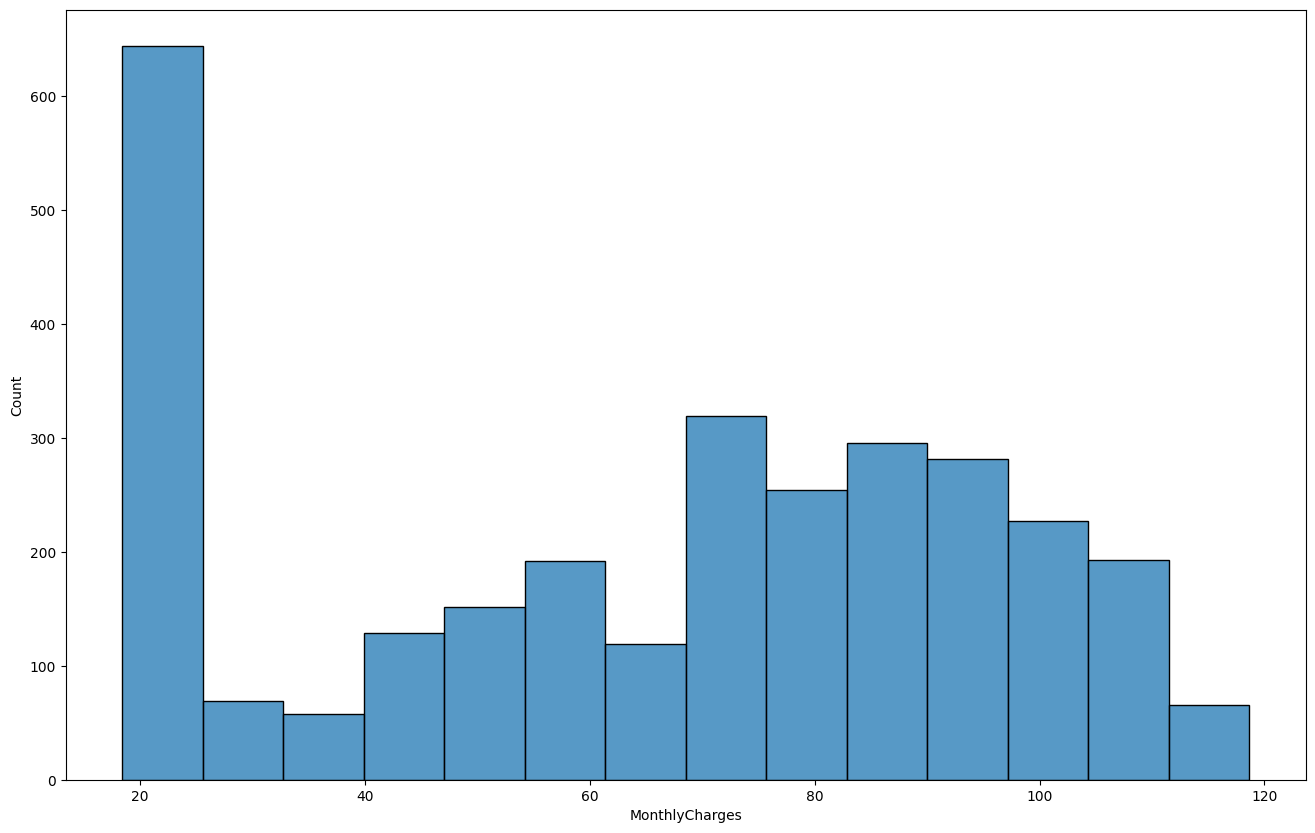

In [23]:
fig, axes = plt.subplots(1,1, figsize=(16,10))

sns.histplot(data=df_train, x='MonthlyCharges')
plt.show()

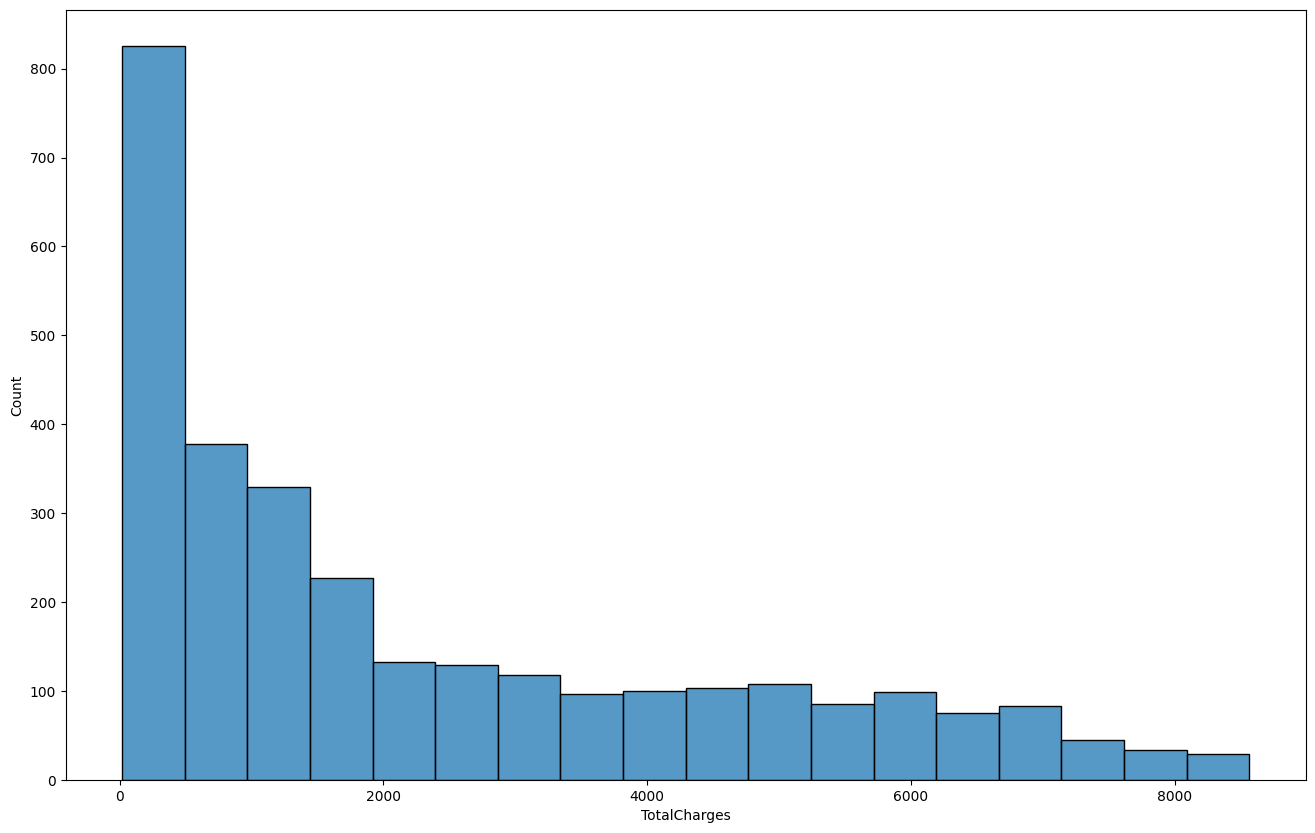

In [24]:
fig, axes = plt.subplots(1,1, figsize=(16,10))

sns.histplot(data=df_train, x='TotalCharges')
plt.show()

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

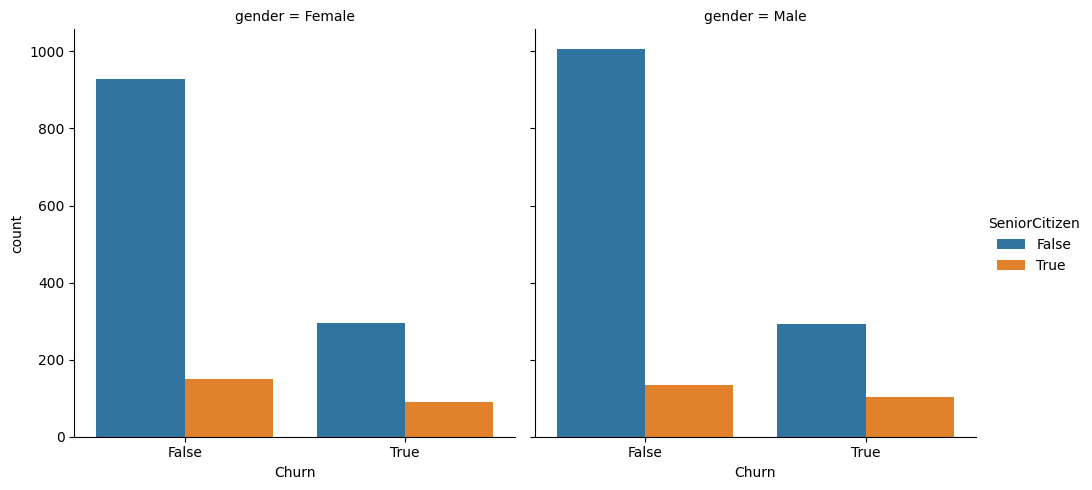

In [25]:
# Code here
# How many people have churned and whether or not they were senior citizens?
sns.catplot(data=df_train, x='Churn', kind='count', col='gender', hue='SeniorCitizen')

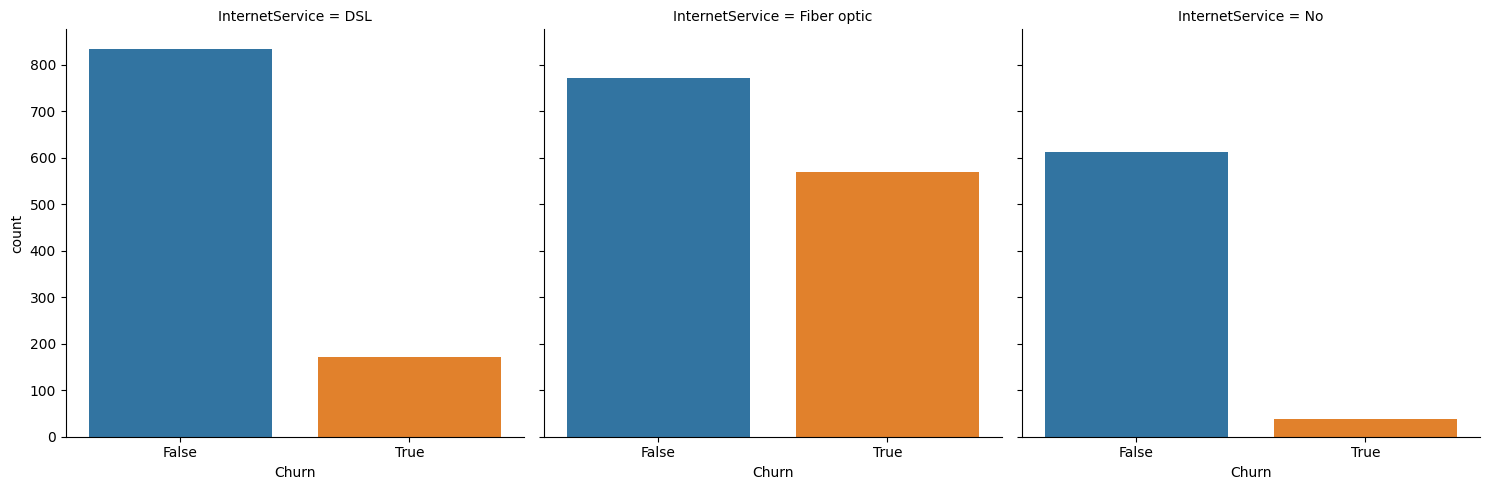

In [26]:
# How many people have churned and they had subscribed to the internet service?
sns.catplot(data=df_train, x='Churn', kind='count', col='InternetService')
plt.show()

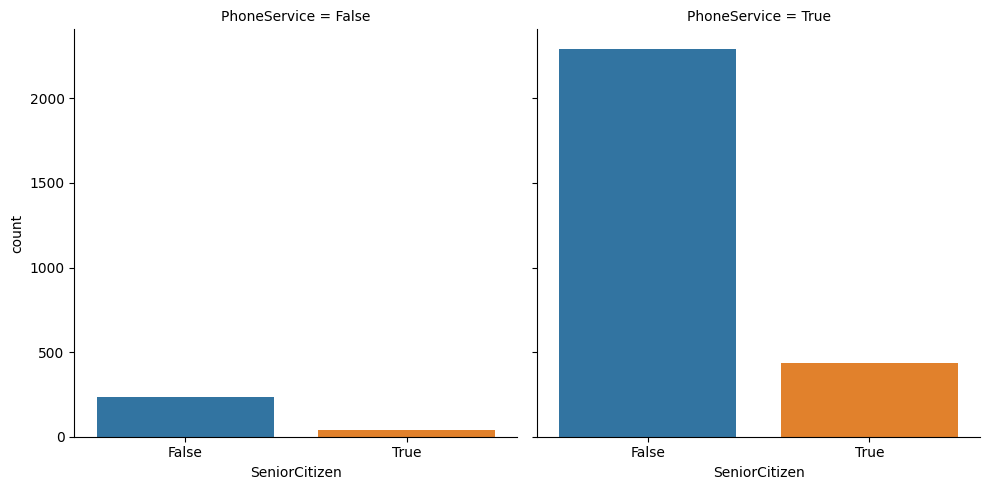

In [27]:
# Which demography patronises more of the Phone Service?
sns.catplot(data=df_train, x='SeniorCitizen', kind='count', col='PhoneService')
plt.show()

In [28]:
#sns.catplot(data=df_train, x='TotalCharges', kind='count', col='tenure')

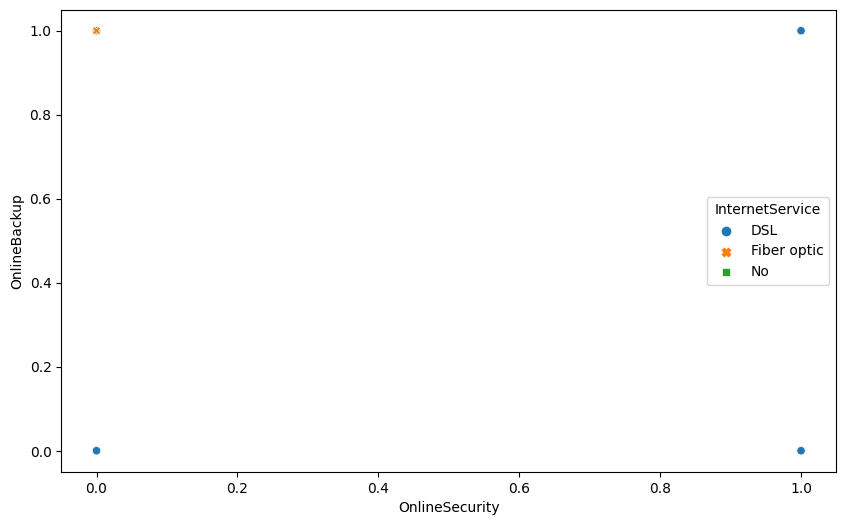

In [29]:
# How does InternetService relate to other services?
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_train, x="OnlineSecurity", y="OnlineBackup", hue="InternetService", style="InternetService")
plt.show()

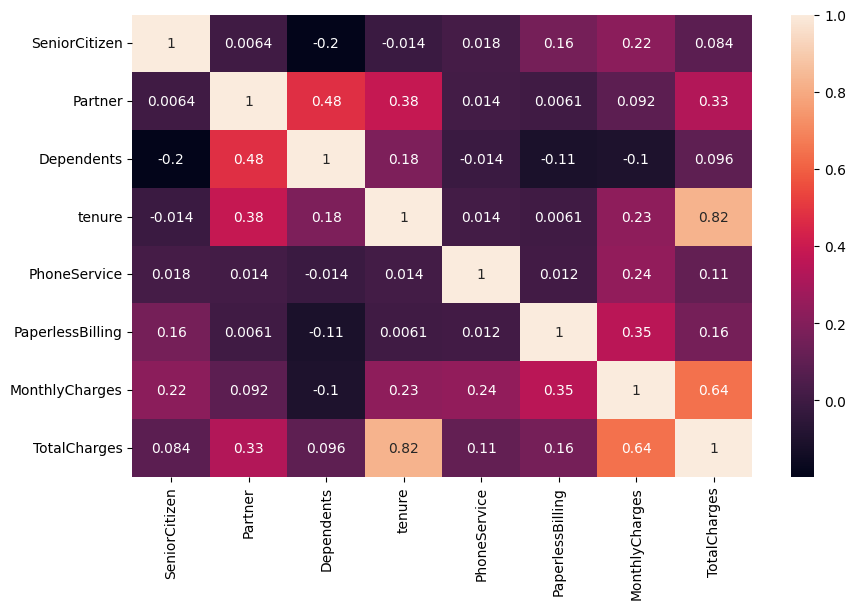

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [31]:
# Use pandas.DataFrame.drop_duplicates method
df_train.duplicated().sum()

0

## Dataset Splitting

In [32]:
# Use train_test_split with a random_state, and add stratify for Classification

#Setting a random seed
np.random.seed(42)



## Handling Missing Values

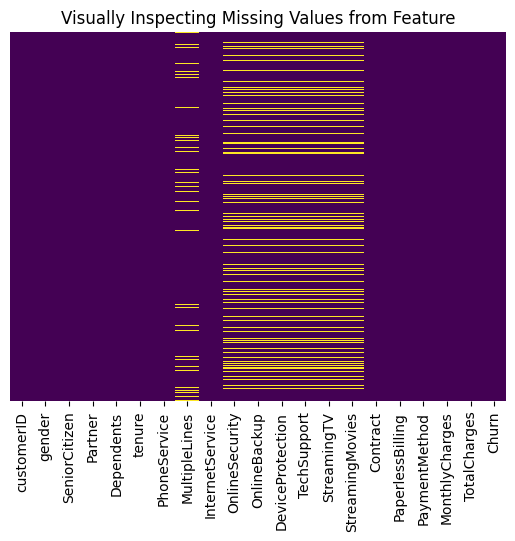

In [33]:
#Visually inspecting missing values
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visually Inspecting Missing Values from Feature')
plt.show()

In [34]:
percentage_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_values_df = pd.DataFrame({'column_name': df_train.columns,\
                                  'percentage_missing': percentage_missing})
missing_values_df

,column_name,percentage_missing
customerID,customerID,0.000000
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
Partner,Partner,0.000000
Dependents,Dependents,0.000000
tenure,tenure,0.000000
PhoneService,PhoneService,0.000000
MultipleLines,MultipleLines,8.966667
InternetService,InternetService,0.000000
OnlineSecurity,OnlineSecurity,21.700000


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [36]:
df_train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [37]:
df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Two Scenarios:

* Worst Case Scenario: with all `null` values dropped
* Best Case Scenario: With `null` values imputed

In [38]:
worst_case = df_train

In [39]:
worst_case.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [40]:
worst_case.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [41]:
worst_case.dropna(subset=['MultipleLines', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 
                          'TechSupport','StreamingTV', 
                          'StreamingMovies', 'Churn', 'TotalCharges'], axis=0,inplace=True)

In [42]:
worst_case.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
worst_case

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,1303-SRDOK,Female,False,True,True,55,True,False,Fiber optic,False,...,False,False,False,False,Two year,True,Credit card (automatic),69.050003,3842.600098,False
2991,2207-QPJED,Female,True,True,False,37,True,False,Fiber optic,False,...,True,True,True,False,Month-to-month,False,Electronic check,90.000000,3371.750000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True


In [44]:
worst_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 1 to 2998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2078 non-null   object 
 1   gender            2078 non-null   object 
 2   SeniorCitizen     2078 non-null   bool   
 3   Partner           2078 non-null   bool   
 4   Dependents        2078 non-null   bool   
 5   tenure            2078 non-null   int64  
 6   PhoneService      2078 non-null   bool   
 7   MultipleLines     2078 non-null   object 
 8   InternetService   2078 non-null   object 
 9   OnlineSecurity    2078 non-null   object 
 10  OnlineBackup      2078 non-null   object 
 11  DeviceProtection  2078 non-null   object 
 12  TechSupport       2078 non-null   object 
 13  StreamingTV       2078 non-null   object 
 14  StreamingMovies   2078 non-null   object 
 15  Contract          2078 non-null   object 
 16  PaperlessBilling  2078 non-null   bool   


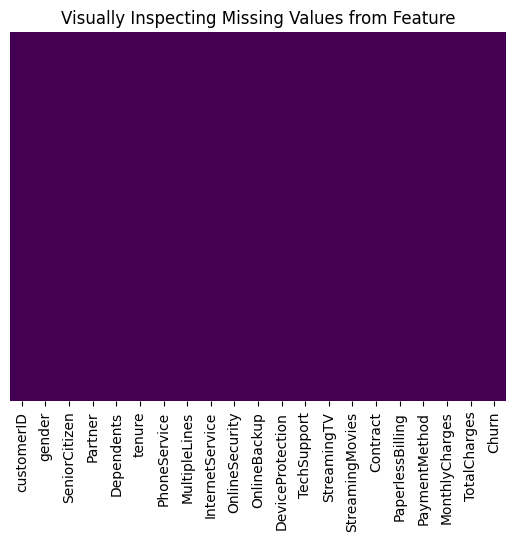

In [45]:
#Visually inspecting missing values
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visually Inspecting Missing Values from Feature')
plt.show()

## Drooping Irrelevant Features and Feature Encoding

In [46]:
worst_case.drop('customerID', axis=1, inplace=True)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X = worst_case.drop('Churn', axis=1)
y = pd.get_dummies(worst_case['Churn'])

enc = OneHotEncoder()
enc = enc.fit_transform(worst_case[['Churn']]).toarray()
y2 = enc.reshape(-1)

boolean_features = ['SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV',
                    'StreamingMovies','PaperlessBilling']

categorical_features = ['gender','InternetService', 'Contract','PaymentMethod']

one_hot = OneHotEncoder(handle_unknown="ignore")

transformer = ColumnTransformer([('one_hot_cat', one_hot, categorical_features),
                                 ('one_hot', one_hot, boolean_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)



transformed_X

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.40000000e+01, 5.69500008e+01, 1.88950000e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 5.38499985e+01, 1.08150002e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 7.06999969e+01, 1.51649994e+02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.80000000e+01, 6.05999985e+01, 1.15634998e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.90000000e+01, 8.99499969e+01, 6.14314990e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 7.47500000e+01, 1.44800003e+02]])

In [48]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

## First Estimator on First Scenario

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
clf.score(X_test, y_test)

0.7283653846153846

In [51]:
y_preds = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7283653846153846

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       282
           1       0.60      0.55      0.57       134

   micro avg       0.74      0.73      0.73       416
   macro avg       0.70      0.68      0.69       416
weighted avg       0.73      0.73      0.73       416
 samples avg       0.73      0.73      0.73       416



## Second Estimator on First Scenario

In [54]:
from sklearn.neighbors import KNeighborsClassifier

kneighbour = KNeighborsClassifier()
kneighbour.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
kneighbour_preds = kneighbour.predict(X_test)

In [56]:
kneighbour.score(X_test, y_test)

0.7163461538461539

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, kneighbour_preds)

0.7163461538461539

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, kneighbour_preds))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       282
           1       0.58      0.45      0.50       134

   micro avg       0.72      0.72      0.72       416
   macro avg       0.67      0.65      0.65       416
weighted avg       0.70      0.72      0.71       416
 samples avg       0.72      0.72      0.72       416



## Third Estimator on First Scenario

In [59]:
from sklearn.ensemble import AdaBoostClassifier

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y2[:2078], test_size=0.2)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [60]:
ada_pred_ = ada.predict(X_test)
print(classification_report(y_test, ada_pred_))

              precision    recall  f1-score   support

         0.0       0.49      0.44      0.46       211
         1.0       0.48      0.54      0.51       205

    accuracy                           0.49       416
   macro avg       0.49      0.49      0.49       416
weighted avg       0.49      0.49      0.49       416



In [61]:
ada.score(X_test,y_test)

0.4879807692307692

## Fourth Estimator on Second Scenario

In [62]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_split=5)
dtc.fit(X_test,y_test)

DecisionTreeClassifier(min_samples_split=5)

In [63]:
dtc_pred = dtc.predict(X_test)

In [64]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       211
         1.0       0.95      0.89      0.92       205

    accuracy                           0.92       416
   macro avg       0.92      0.92      0.92       416
weighted avg       0.92      0.92      0.92       416



In [65]:
dtc.score(X_test, y_test)

0.9206730769230769

## Best Case Scenario

In [66]:
best_case = pd.read_csv(TRAIN_FILE)

In [67]:
best_case.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [68]:
best_case['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [69]:
best_case[best_case['InternetService'].values == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,False,False,False,16,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.799988,False
16,8191-XWSZG,Female,False,False,False,52,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.950012,False
21,1680-VDCWW,Male,False,True,False,12,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.250000,False
22,1066-JKSGK,Male,False,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.150000,True
33,7310-EGVHZ,Male,False,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200001,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,6765-MBQNU,Female,False,True,False,26,True,True,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,26.000000,684.049988,False
2987,3769-MHZNV,Female,False,True,True,33,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Mailed check,20.100000,670.349976,False
2989,3308-MHOOC,Male,False,False,True,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,True,Mailed check,19.200001,19.200001,False
2993,2239-CFOUJ,Male,False,True,True,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.400000,20.400000,False


In [70]:
best_case.loc[best_case['InternetService'] == 'No', ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']] = False

In [71]:
best_case[best_case['MultipleLines'].isna() ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
7,6713-OKOMC,Female,False,False,False,10,False,NaN,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
20,8779-QRDMV,Male,True,False,False,1,False,NaN,DSL,False,...,True,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650002,True
27,8665-UTDHZ,Male,False,True,True,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200001,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,9443-JUBUO,Male,False,True,True,72,False,NaN,DSL,True,...,True,True,True,True,Two year,True,Credit card (automatic),65.250000,4478.850098,False
2990,2309-OSFEU,Male,False,False,False,10,False,NaN,DSL,False,...,False,False,False,True,Month-to-month,True,Mailed check,33.900002,298.450012,True
2992,4177-JPDFU,Male,False,False,False,12,False,NaN,DSL,False,...,False,True,False,False,Month-to-month,False,Mailed check,34.000000,442.450012,False
2994,8046-DNVTL,Male,False,True,False,62,False,NaN,DSL,True,...,False,True,False,False,Two year,True,Credit card (automatic),38.599998,2345.550049,False


In [72]:
another = best_case.groupby(['InternetService','MultipleLines']).count()
another

customerID  gender  SeniorCitizen  Partner  \
InternetService MultipleLines                                               
DSL             False                 442     442            442      442   
                True                  295     295            295      295   
Fiber optic     False                 501     501            501      501   
                True                  842     842            842      842   
No              False                 494     494            494      494   
                True                  157     157            157      157   

                               Dependents  tenure  PhoneService  \
InternetService MultipleLines                                     
DSL             False                 442     442           442   
                True                  295     295           295   
Fiber optic     False                 501     501           501   
                True                  842     842           842   
No              False                 494     494           494   
                True                  157     157           157   

                               OnlineSecurity  OnlineBackup  DeviceProtection  \
InternetService MultipleLines                                                   
DSL             False                     442           442               442   
                True                      295           295               295   
Fiber optic     False                     501           501               501   
                True                      842           842               842   
No              False                     494           494               494   
                True                      157           157               157   

                               TechSupport  StreamingTV  StreamingMovies  \
InternetService MultipleLines                                              
DSL             False                  442          442              442   
                True                   295          295              295   
Fiber optic     False                  501          501              501   
                True                   842          842              842   
No              False                  494          494              494   
                True                   157          157              157   

                               Contract  PaperlessBilling  PaymentMethod  \
InternetService MultipleLines                                              
DSL             False               442               442            442   
                True                295               295            295   
Fiber optic     False               501               501            501   
                True                842               842            842   
No              False               494               494            494   
                True                157               157            157   

                               MonthlyCharges  TotalCharges  Churn  
InternetService MultipleLines                                       
DSL             False                     442           441    442  
                True                      295           295    295  
Fiber optic     False                     501           501    501  
                True                      842           842    841  
No              False                     494           493    494  
                True                      157           156    157

In [73]:
best_case.loc[(best_case['InternetService'] == 'DSL') & (best_case['MultipleLines'] is True) , 'MultipleLines'] = False

In [74]:
best_case.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [75]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical features with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value=False)

#Define columns
cat_features = ['MultipleLines']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([('cat_imputer',cat_imputer,cat_features)])

#Transform the data
filled_X = imputer.fit_transform(best_case)
filled_X

array([[False],
       [False],
       [False],
       ...,
       [True],
       [False],
       [False]], dtype=object)

In [76]:
best_case['MultipleLiness'] = filled_X

In [77]:
best_case.drop('MultipleLines', axis=1, inplace=True)

In [78]:
new_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLiness', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']
best_case = best_case.reindex(columns=new_cols)

In [79]:
best_case.rename(columns={'MultipleLiness':'MultipleLines'}, inplace=True)

In [80]:
best_case.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               1
dtype: int64

In [81]:
best_case.dropna(subset=['TotalCharges','Churn'], inplace=True)

In [82]:
best_case.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
best_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2994 non-null   object 
 1   gender            2994 non-null   object 
 2   SeniorCitizen     2994 non-null   bool   
 3   Partner           2994 non-null   bool   
 4   Dependents        2994 non-null   bool   
 5   tenure            2994 non-null   int64  
 6   PhoneService      2994 non-null   bool   
 7   MultipleLines     2994 non-null   object 
 8   InternetService   2994 non-null   object 
 9   OnlineSecurity    2994 non-null   object 
 10  OnlineBackup      2994 non-null   object 
 11  DeviceProtection  2994 non-null   object 
 12  TechSupport       2994 non-null   object 
 13  StreamingTV       2994 non-null   object 
 14  StreamingMovies   2994 non-null   object 
 15  Contract          2994 non-null   object 
 16  PaperlessBilling  2994 non-null   bool   


In [84]:
best_case.drop('customerID', axis=1, inplace=True)

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

X2 = best_case.drop('Churn', axis=1)
y2 = pd.get_dummies(best_case['Churn'])

enc = OneHotEncoder()
enc = enc.fit_transform(best_case[['Churn']]).toarray()

boolean_features = ['SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV',
                    'StreamingMovies','PaperlessBilling']

categorical_features = ['gender','InternetService', 'Contract','PaymentMethod']

one_hot = OneHotEncoder(handle_unknown="ignore")

transformer = ColumnTransformer([('one_hot_cat', one_hot, categorical_features),
                                 ('one_hot', one_hot, boolean_features)], remainder='passthrough')

transformed_X_ = transformer.fit_transform(X2)



transformed_X_

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 2.98500004e+01, 2.98500004e+01],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.40000000e+01, 5.69500008e+01, 1.88950000e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 5.38499985e+01, 1.08150002e+02],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.90000000e+01, 8.99499969e+01, 6.14314990e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 7.47500000e+01, 1.44800003e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.90000000e+01, 2.06000004e+01, 4.14950012e+02]])

In [86]:
np.random.seed(42)

X_train_, X_test_, y_train_, y_test_ = train_test_split(transformed_X_,y2, test_size=0.2)

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train_, y_train_)

RandomForestClassifier()

In [88]:
clf.score(X_test_, y_test_)

y_preds_ = clf.predict(X_test_)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_, y_preds_)

0.7946577629382304

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test_, y_preds_))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       430
           1       0.68      0.51      0.59       169

   micro avg       0.80      0.79      0.80       599
   macro avg       0.76      0.71      0.73       599
weighted avg       0.79      0.79      0.79       599
 samples avg       0.79      0.79      0.79       599



## Second Model with Second Scenario

In [91]:
from sklearn.neighbors import KNeighborsClassifier

kneighbour = KNeighborsClassifier()
kneighbour.fit(X_train_,y_train_)

KNeighborsClassifier()

In [92]:
kneighbour_y_preds = kneighbour.predict(X_test_)

In [93]:
kneighbour.score(X_test_, y_test_)

0.7779632721202003

In [94]:
print(classification_report(y_test_, kneighbour_y_preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       430
           1       0.65      0.46      0.54       169

   micro avg       0.78      0.78      0.78       599
   macro avg       0.73      0.68      0.70       599
weighted avg       0.76      0.78      0.77       599
 samples avg       0.78      0.78      0.78       599



## Third Model on Second Scenario 

In [95]:
y3 = enc.reshape(-1)

In [96]:
from sklearn.ensemble import AdaBoostClassifier

np.random.seed(42)

X_train_, X_test_, y_train_, y_test_ = train_test_split(transformed_X_,y3[:2994], test_size=0.2)

ada = AdaBoostClassifier()
ada.fit(X_train_, y_train_)

AdaBoostClassifier()

In [97]:
ada.score(X_test_,y_test_)

0.4574290484140234

In [98]:
ada_pred = ada.predict(X_test_)

In [99]:
print(classification_report(y_test_, ada_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.46      0.45       291
         1.0       0.47      0.46      0.46       308

    accuracy                           0.46       599
   macro avg       0.46      0.46      0.46       599
weighted avg       0.46      0.46      0.46       599



## Fourth Model on Second Scenario

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_split=5)
dtc.fit(X_test_,y_test_)

DecisionTreeClassifier(min_samples_split=5)

In [101]:
dtc_pred = dtc.predict(X_test_)

In [102]:
print(classification_report(y_test_, dtc_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       291
         1.0       0.96      0.86      0.91       308

    accuracy                           0.91       599
   macro avg       0.92      0.91      0.91       599
weighted avg       0.92      0.91      0.91       599



In [103]:
dtc.score(X_test_, y_test_)

0.9131886477462438

## Impute Missing Values

In [104]:
# Use sklearn.impute.SimpleImputer

## New Features Creation

In [105]:
# Code here

## Features Encoding




In [106]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Features Scaling


In [107]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

In [108]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [109]:
# Code here

### Train the Model

In [110]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [111]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [112]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [113]:
# Code here

### Train the Model

In [114]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [115]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [116]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [117]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [118]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app